In [18]:
#imports
import os
import pandas as pd
import numpy as np
import scipy.io as sp
from pyproj import Proj
import matplotlib.pyplot as plt

In [6]:
#https://stackoverflow.com/questions/7008608/scipy-io-loadmat-nested-structures-i-e-dictionaries

def loadmat(filename):
    '''
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    '''
    data = sp.loadmat(filename, struct_as_record=False, squeeze_me=True)
    return _check_keys(data)

def _check_keys(dict):
    '''
    checks if entries in dictionary are mat-objects. If yes
    todict is called to change them to nested dictionaries
    '''
    for key in dict:
        if isinstance(dict[key], sp.matlab.mio5_params.mat_struct):
            dict[key] = _todict(dict[key])
    return dict        

def _todict(matobj):
    '''
    A recursive function which constructs from matobjects nested dictionaries
    '''
    dict = {}
    for strg in matobj._fieldnames:
        elem = matobj.__dict__[strg]
        if isinstance(elem, sp.matlab.mio5_params.mat_struct):
            dict[strg] = _todict(elem)
        else:
            dict[strg] = elem
    return dict

5206231.9
263542.9


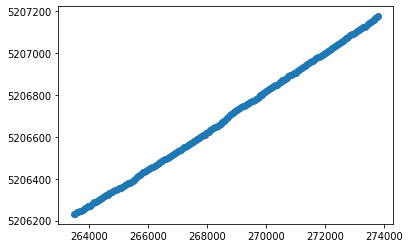

In [51]:
#https://www.openstreetmap.org/export#map=7/45.506/-127.881
#https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db
#http://www.marine-geo.org/references/formats/MGDSNavDataFormat.pdf
#https://seg.org/Portals/0/SEG/News and Resources/Technical Standards/seg_d_rev2.1.pdf

#https://en.wikipedia.org/wiki/Universal_Transverse_Mercator_coordinate_system
#http://www.earthpoint.us/Convert.aspx
#line 1: start Lat 46.9673 N Lon 126.1121 W (E = -W, calculator uses a system with negatives)
#line 1: start Lat 46.9673 N Lon 53.8879 E 

#x_utm = 280,318, y_utm = 5,205,578 (NE) 
#VesselX = 263,543, VesselY = 5,206,232 (close enough)
#5

#https://ocefpaf.github.io/python4oceanographers/blog/2013/12/16/utm/
#https://geopandas.readthedocs.io/en/latest/gallery/cartopy_convert.html

#https://www.maptools.com/tutorials/utm/quick_guide


#lon, lat = myProj(df['Meters East'].values, df['Meters South'].values, inverse=True)#m E, m S


##mapBounds = ((df.longitude.min(), df.longitude.max(),      
##         df.latitude.min(), df.latitude.max())

nav = loadmat(r'C:\Users\zomege\Documents\GitHub\Machine-Learning-On-Seismic-Streamer-Data\Navigation_P190\MGL1212MCS01.mat')['nav']
vesselX = nav['vesselX']
vesselY = nav['vesselY']
depth = nav['vesselY']
shotNumber = nav['shotNumber']
print(vesselY[0])
print(vesselX[1])
plt.scatter(vesselX, vesselY)
plt.show()

In [52]:
def returnCoordsUTM(file):
    nav = loadmat(file)['nav']
    return nav['vesselX'], nav['vesselY']

def plotLinesUTM(folder):
    vx = np.array([])
    vy = np.array([])
    for f in os.listdir(folder):
        nav = loadmat(folder+"\\\\"+f)['nav']
        vx = np.append(vx,nav['vesselX'])
        vy = np.append(vy,nav['vesselY'])
        plt.scatter(nav['vesselX'],nav['vesselY'])
    plt.show()
    return vx,vy
    

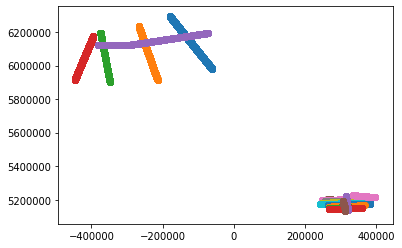

(array([-179528.5, -179506. , -179483.6, ...,  333988.2,  333939.8,
         333891.5]),
 array([6293664.8, 6293606.4, 6293548.3, ..., 5227950.7, 5227964.2,
        5227977.5]))

In [50]:
#Within 9T zone
plotLinesUTM(r'C:\\Users\\zomege\\Documents\\GitHub\\Machine-Learning-On-Seismic-Streamer-Data\\Navigation_P190')

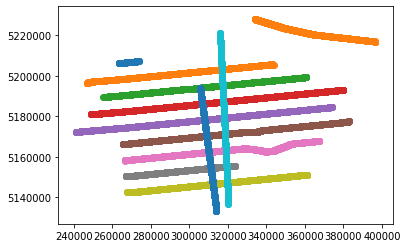

(array([263492.6, 263542.9, 263592.5, ..., 333988.2, 333939.8, 333891.5]),
 array([5206231.9, 5206233.6, 5206239.8, ..., 5227950.7, 5227964.2,
        5227977.5]))

In [53]:
plotLinesUTM(r'C:\\Users\\zomege\\Documents\\GitHub\\Machine-Learning-On-Seismic-Streamer-Data\\Navigation_P190\\Cascadia')